# Course structure

- Course structure overview
- From Business task to mathematical formalization 
- Tasks examples
- Metrics 
- Formalizing the ML model

### Course structure overview

- 2 sessions a week (additional if needed)
- homework
- Q&A in the chat

### From Business task to mathematical formalization

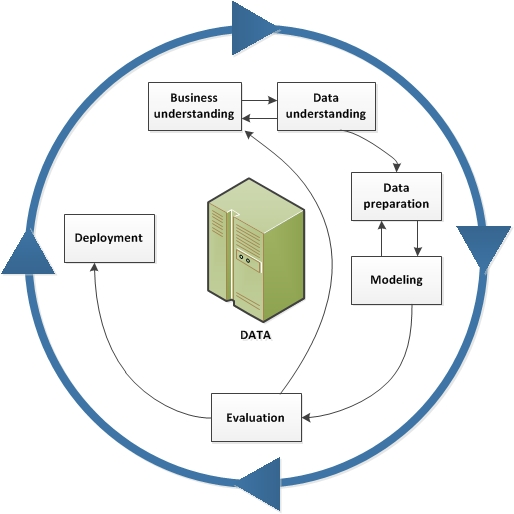

In [1]:
from IPython.display import Image
Image(filename="images/crisp_process.jpg")

CRISP-DM, which stands for Cross-Industry Standard Process for Data Mining, is an industry-proven way to guide your data mining efforts.

- As a methodology , it includes descriptions of the typical phases of a project, the tasks involved with each phase, and an explanation of the relationships between these tasks.
- As a process model , CRISP-DM provides an overview of the data mining life cycle.

#### Step One - Determine Business Understanding

The goal of this stage of the process is to uncover important factors that could influence the outcome of the project.

**Assess the Current Situation**

This involves more detailed fact-finding about all of the resources, constraints, assumptions and other factors that you'll need to consider when determining your data analysis goal and project plan.

List the resources available to the project including:

- People
- Data
- Computing resources
- Software

**Requirements and constraints**

- Requirements including time constraints
- Required quality of results
- Data security concerns, availability and legal issues
- Risks or events that might delay the project
- Construct a cost-benefit analysis for the project 


(**Example:**
Business Problem
Imagine a used car dealer who needs estimates what the price of a used car could be. The car dealer could be interest in predicting the price of a car based on its attributes. More precise, we try to answer to the following business question:

- Is the price of a car related to the horsepower?

Data can be find here: https://archive.ics.uci.edu/ml/datasets/automobile

Or here: https://www.kaggle.com/code/toramky/eda-for-automobile-dataset/notebook


)

#### Step Two - Data Understanding

Initial data collection report - List the data sources acquired together with their locations, the methods used to acquire them and any problems encountered. Record problems you encountered and any resolutions achieved. This will help both with future replication of this project and with the execution of similar future projects.

**Describe Data**

- size
- columns
- types
- existence of labeling

etc.

**Verify Data Quality**

Examine the quality of the data, addressing questions such as:

- Is the data complete (does it cover all the cases required)?
- Is it correct, or does it contain errors and, if there are errors, how common are they?
- Are there missing values in the data? If so, how are they represented, where do they occur, and how common are they?

**Missing Data**

Another common problem when dealing with real-world data is missing values. These can arise for many reasons and have to be either filled in or removed before we train a model.

While we always want to be careful about removing information, if a column has a high percentage of missing values, then it probably will not be useful to our model.

**Initial Data Exploration**

These may include:

- Distribution of key attributes (for example, the target attribute of a prediction task)
- Relationships between pairs or small numbers of attributes
- Results of simple aggregations
- Properties of significant sub-populations
- Simple statistical analysis



In [27]:
import pandas as pd
import numpy as np

automobile = pd.read_csv('Automobile_data.csv')
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [28]:
automobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [29]:
automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### Step Three - Data Preperation

**Clean The Data**

This may involve selecting clean subsets of the data, the insertion of suitable defaults, or more ambitious techniques such as the estimation of missing data by modelling.

- Label Encoding
- Drop Unnecessary Columns
- Altering Data Types
- Dealing With Zeros
- Dealing With Duplicates



In [31]:
automobile['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [32]:
automobile['price'].loc[automobile['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [33]:
#Setting the missing value to mean of price and convert the datatype to integer
price = automobile['price'].loc[automobile['price'] != '?']
pmean = price.astype(str).astype(int).mean()
automobile['price'] = automobile['price'].replace('?',pmean).astype(int)
automobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [46]:
# Checking the numberic and replacing with mean value and conver the datatype to integer
automobile['horsepower'].str.isnumeric().value_counts()
horsepower = automobile['horsepower'].loc[automobile['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',pmean).astype(int)

#### Step Four - Exploratory Data Analysis

Involves using graphics and visualizations to explore and analyze a data set. The goal is to explore, investigate and learn, as opposed to confirming statistical hypotheses. 

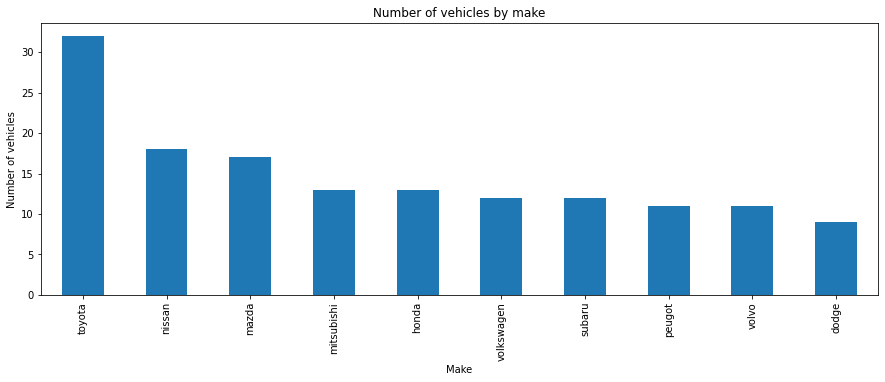

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

automobile.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

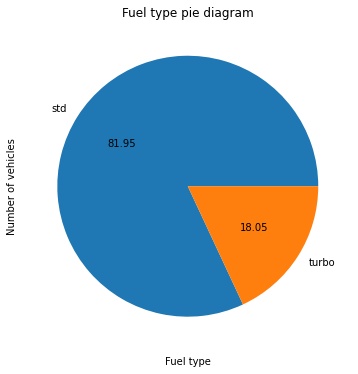

In [38]:
automobile['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

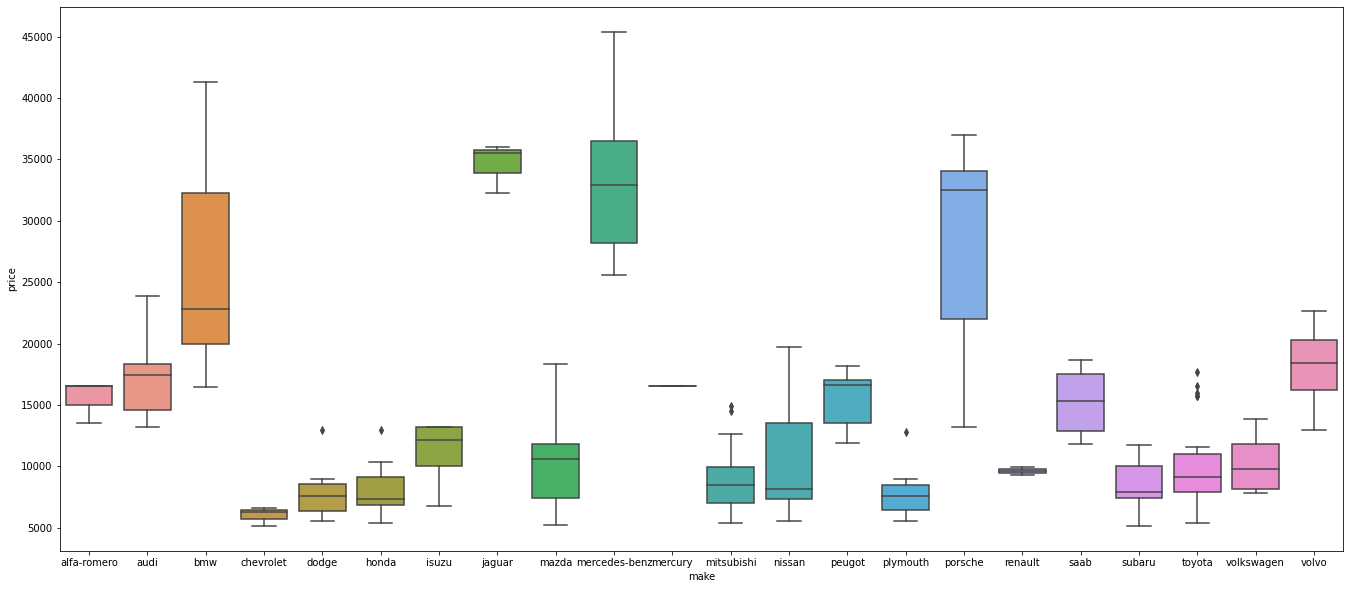

In [41]:
import seaborn as sns
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=automobile)

#### Step Five - Modelling

- Start with a simple model as a benchmark
- Define metrics
- Build Model
- Assess Model

RMSE: 3954.8915942180797


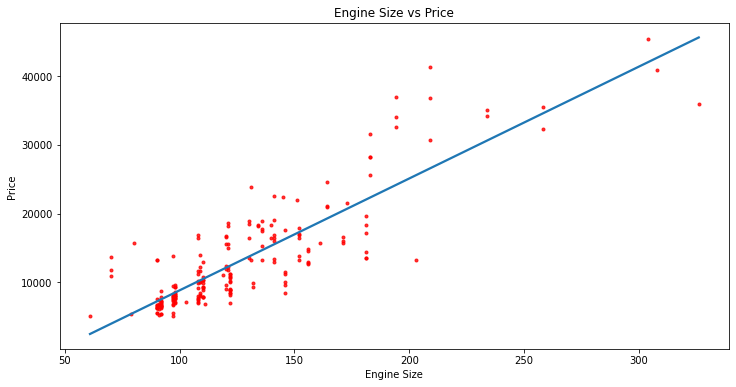

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model

x = automobile['engine-size'].values.reshape(-1,1) # independant variable
y = automobile['price'] # dependant variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1) # initialize training and tests for both variables
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train) # fit data to linear regression model
predictions = lin_reg.predict(x_test) # linear regression predictions for x variable

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#print('MAE:', metrics.mean_absolute_error(y_test, predictions))

plt.figure(figsize=(12,6))
g = sns.regplot(x=automobile['engine-size'],y=automobile["price"],ci=None,scatter_kws = {'color':'r','s':9})
g.set_title("Engine Size vs Price")
g.set_ylabel("Price")
g.set_xlabel('Engine Size')
plt.show()

#### Step Six - repeat

If the results are not satisfying, repeat from the needed step:
- check data, maybe you can get more data
- check correlations
- try different model
- etc.

# Goal of NLP

Understand natural language and convert it to structured data and back

Natural language:

- Ambiguous
- Noisy
- Evolving

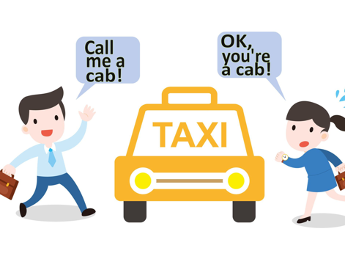

In [5]:
Image(filename="images/p1.png")

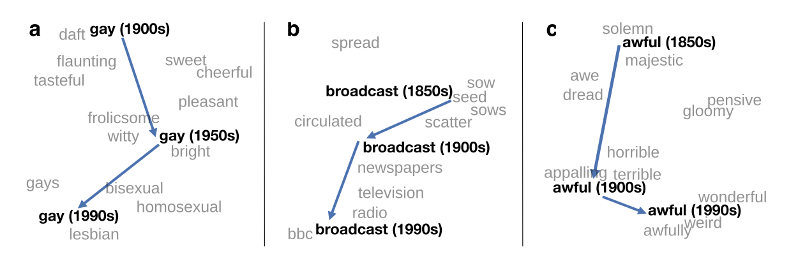

In [4]:
Image(filename="images/p2.png")

# Types of NLP applications

In [1]:
#!pip install flair

### Part of speech tagging

Link to SpaCy: https://spacy.io/usage/spacy-101

In [10]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('universal_tagset')
from nltk import word_tokenize
text = "Apple is looking at buying U.K. startup for $1 billion"
tokens = word_tokenize(text)
tags = nltk.pos_tag(tokens, tagset = "universal")

In [11]:
#!python -m spacy download en
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, style = "dep")

#TODO: try with ukrainian uk_core_news_sm

In [4]:
displacy.render(doc, style = "ent")

### Name-entity recognition

In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

displacy.render(doc, style = "ent")

# TODO: try for Ukrainian with uk_core_news_sm model

In [8]:
from flair.data import Sentence
from flair.models import SequenceTagger

# make a sentence
sentence = Sentence('Apple is looking at buying U.K. startup for $1 billion')

# load the NER tagger
tagger = SequenceTagger.load('ner')

# run NER over sentence
tagger.predict(sentence)

/Users/romankyslyi/miniforge3/lib/python3.9/site-packages/huggingface_hub/file_download.py:560: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


2023-01-29 22:12:23,609 loading file /Users/romankyslyi/.flair/models/ner-english/4f4cdab26f24cb98b732b389e6cebc646c36f54cfd6e0b7d3b90b25656e4262f.8baa8ae8795f4df80b28e7f7b61d788ecbb057d1dc85aacb316f1bd02837a4a4
2023-01-29 22:12:26,174 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>


In [9]:
# print the sentence with all annotations
print(sentence)

print('The following NER tags are found:')

# iterate over entities and print each
for entity in sentence.get_spans('ner'):
    print(entity)

Sentence: "Apple is looking at buying U.K. startup for $ 1 billion" → ["Apple"/ORG, "U.K."/LOC]
The following NER tags are found:
Span[0:1]: "Apple" → ORG (0.9988)
Span[5:6]: "U.K." → LOC (0.9971)


### Text classification

- entailment, which means the hypothesis is true.
- contraction, which means the hypothesis is false.
- neutral, which means there's no relation between the hypothesis and the premise.

Example:

- Premise: Soccer game with multiple males playing.  
- Hypothesis: Some men are playing a sport.  
- Label: Entailment

In [54]:
# https://huggingface.co/tasks/text-classification
from transformers import pipeline

classifier = pipeline("text-classification", model = "roberta-large-mnli")
classifier("A soccer game with multiple males playing. Some men are playing a sport.")

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'label': 'ENTAILMENT', 'score': 0.9883742332458496}]

In [52]:
classifier("This product makes my work easier. I like this product")

[{'label': 'ENTAILMENT', 'score': 0.7040523886680603}]

In [53]:
classifier("This product makes my work easier. I hate this product")

[{'label': 'CONTRADICTION', 'score': 0.9840320944786072}]

### Sentiment analysis

This type detects emotions and feelings in a given text. For example, the emotions can be happiness or anger.

For Example:

“This product makes my work easier”: This shows Happiness.

“It has ruined my schedule and caused me pain”: This shows Anger.

In [17]:
#!pip install -q transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["This product makes my work easier", "It has ruined my schedule and caused me pain"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9957475066184998},
 {'label': 'NEGATIVE', 'score': 0.9996951818466187}]

### Language identification

In [19]:
#!pip install langdetect
#!pip install fasttext

In [21]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
detect('Українська пшениця до нового року може здорожчати до 400 $/т.')

'uk'

In [26]:
#!curl --output lid.176.ftz https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  916k  100  916k    0     0   285k      0  0:00:03  0:00:03 --:--:--  285kk      0  0:00:05  0:00:01  0:00:04  164k   240k      0  0:00:03  0:00:02  0:00:01  240k


In [28]:
import fasttext
model = fasttext.load_model('lid.176.ftz')
print(model.predict('Українська пшениця до нового року може здорожчати до 400 $/т.', k=2))  # top 2 matching languages


(('__label__uk', '__label__ru'), array([0.97957414, 0.00537864]))


# Metrics

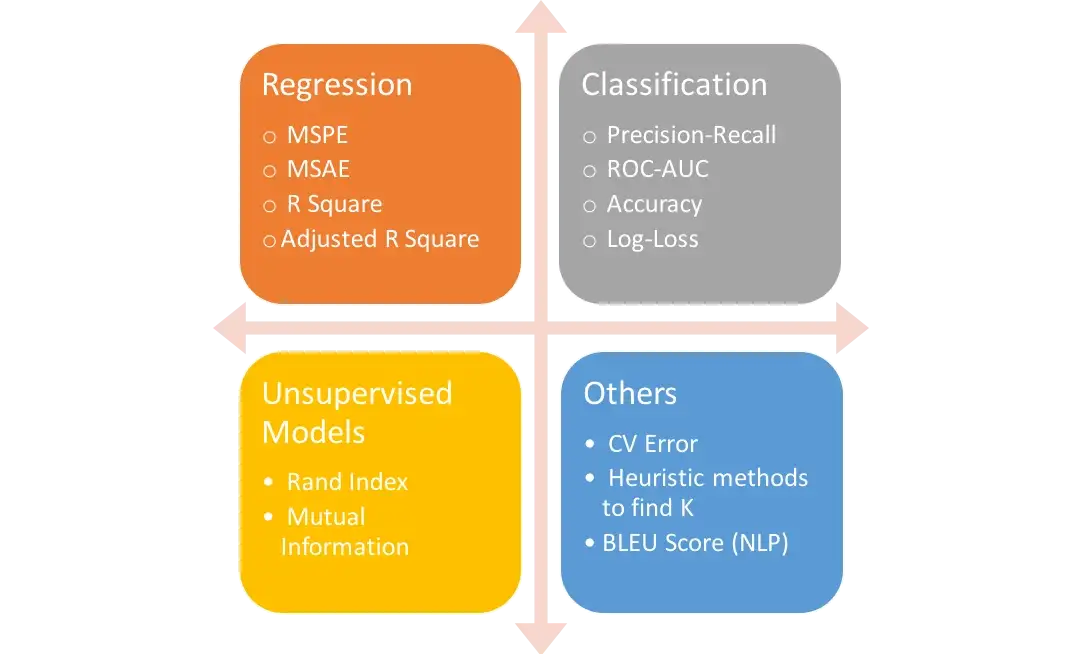

In [6]:
Image(filename="images/metrica_1.jpg")

### Regression

**RMSE (Root Mean Square Error) and MSE**

It represents the sample standard deviation of the differences between predicted values and observed values (called residuals). Mathematically, it is calculated using this formula:

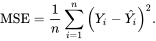

In [10]:
Image(filename="images/mse.png")

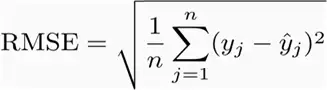

In [8]:
Image(filename="images/rmse.jpg")

RMSE and MSE is similiar in terms of minimizers - value minimizes RMSE if and only if it minimizes MSE. This means that in terms of competitions we can optimize MSE instead of RMSE. In fact it is easier to work with MSE.


**MAE**

MAE is the average of the absolute difference between the predicted values and observed value. The MAE is a linear score which means that all the individual differences are weighted equally in the average. For example, the difference between 10 and 0 will be twice the difference between 5 and 0. However, same is not true for RMSE which we will discuss more in details further. Mathematically, it is calculated using this formula:


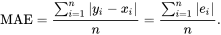

In [11]:
Image(filename="images/mae.png")

#### Which one should you choose and why?

it is easy to understand and interpret MAE because it directly takes the average of offsets whereas RMSE penalizes the higher difference more than MAE.
Let’s understand the above statement with the two examples:

Case 1: Actual Values = [2,4,6,8] , Predicted Values = [4,6,8,10]

Case 2: Actual Values = [2,4,6,8] , Predicted Values = [4,6,8,12]

MAE for case 1 = 2.0, RMSE for case 1 = 2.0

MAE for case 2 = 2.5, RMSE for case 2 = 2.65

From the above example, we can see that RMSE penalizes the last value prediction more heavily than MAE. Generally, RMSE will be higher than or equal to MAE. The only case where it equals MAE is when all the differences are equal or zero (true for case 1 where the difference between actual and predicted is 2 for all observations).

However, even after being more complex and biased towards higher deviation, RMSE is still the default metric of many models because loss function defined in terms of RMSE is smoothly differentiable and makes it easier to perform mathematical operations.

### Classification

**Accuracy**

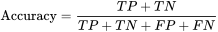

In [12]:
Image(filename="images/accuracy.png")

where TP = True positive; FP = False positive; TN = True negative; FN = False negative

Accuracy simply measures what percent of your predictions were correct. It's the ratio between the number of correct predictions and the total number of predictions. The downside is that it is hard to optimize.

Accuracy is also the most misused metric. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

**Confusion Matrix**

The confusion matrix is a handy presentation of the accuracy of a model with 2 or more classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.


Some definitions:
- True positives (class A correctly identified as class A)
- False positives (non class A incorrectly predicted as class A)
- True negatives (non class A correctly predicted as non-class A)
- False negatives (class A incorrectly predicted as non-class A)


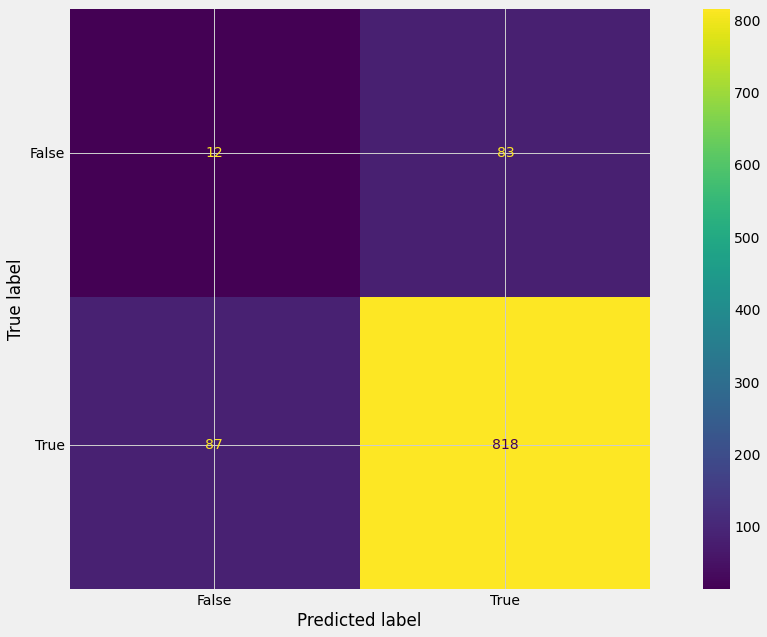

In [57]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**Precision & Recall**

Precision answers the question: What percent of positive predictions were correct?
- True Positive / (True Positive + False Positive)

Recall answers the question: What percent of the positive cases did you catch?
- True Positive / (True Positive + False Negative)



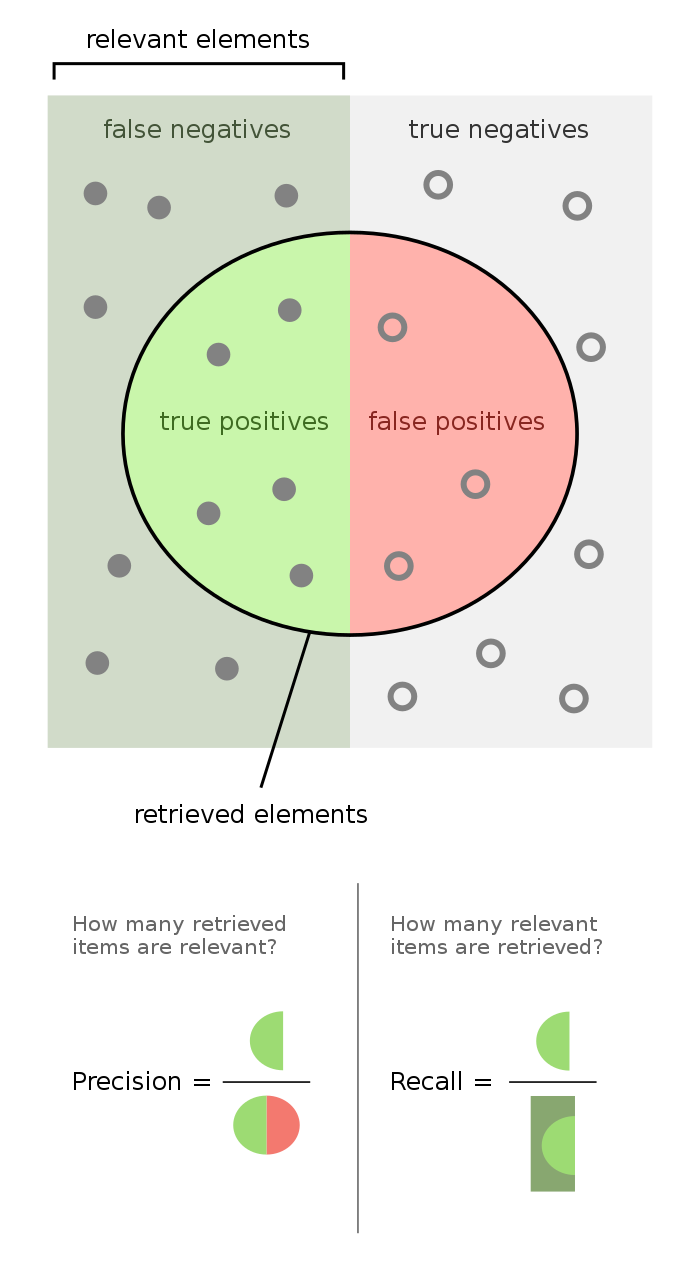

In [14]:
Image(filename="images/pr.png")

- A model with high recall succeeds well in finding all the positive cases in the data, even though they may also wrongly identify some negative cases as positive cases.
- A model with low recall is not able to find all (or a large part) of the positive cases in the data.

Ideally, we would want both: a model that identifies all of our positive cases and that is at the same time identifies only positive cases.

In real life, we, unfortunately, have to deal with the so-called Precision-Recall Trade-Off.

The Precision-Recall Trade-Off represents the fact that in many cases, you can tweak a model to increase precision at a cost of a lower recall, or on the other hand increase recall at the cost of lower precision.

In [60]:
precision = metrics.precision_score(actual, predicted)
precision

0.9078801331853497

In [62]:
recall = metrics.recall_score(actual, predicted)
recall

0.9038674033149171

### F-score
The goal of the F1 score is to combine the precision and recall metrics into a single metric. At the same time, the F1 score has been designed to work well on imbalanced data.

F-score is the "harmonic mean" of precision and sensitivity.

- 2 * ((Precision * Recall) / (Precision + Recall))


Since the F1 score is an average of Precision and Recall, it means that the F1 score gives equal weight to Precision and Recall:

- A model will obtain a high F1 score if both Precision and Recall are high
- A model will obtain a low F1 score if both Precision and Recall are low
- A model will obtain a medium F1 score if one of Precision and Recall is low and the other is high

In [63]:
from sklearn.metrics import f1_score
f1_score(actual, predicted)

0.9058693244739756

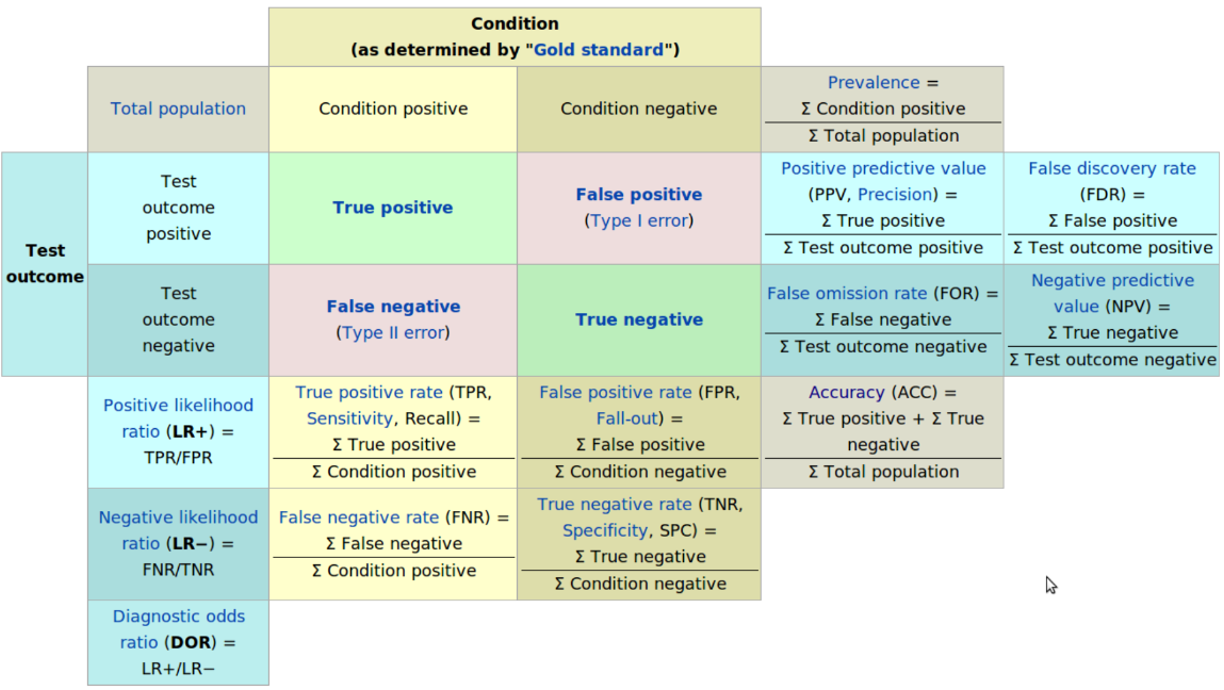

In [15]:
Image(filename="images/f1-score.png")

# Formalizing the ML model

Machine learning - is a subset of AI that studies algorithms that can learn without direct programming. 

A program learns from experience E with respect to a class of problems T in the sense of a measure of quality L if, in solving problem T, the quality measured by measure L increases when a new experience E is demonstrated.


**Supervised learning** - the task of deriving a function 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>f</mi>
  <mo>:</mo>
  <mi>X</mi>
  <mo stretchy="false">&#x2192;</mo>
  <mi>Y</mi>
</math> 
from a given labeled data; each example is a pair of the feature vector of the object and the desired response to it
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>D</mi>
  <mo>=</mo>
  <msub>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">{</mo>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">(</mo>
        <msub>
          <mi>x</mi>
          <mi>i</mi>
        </msub>
        <mo>,</mo>
        <msub>
          <mi>y</mi>
          <mi>i</mi>
        </msub>
        <mo data-mjx-texclass="CLOSE">)</mo>
      </mrow>
      <mo data-mjx-texclass="CLOSE">}</mo>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
      <mo>,</mo>
      <mo>&#x2026;</mo>
      <mo>,</mo>
      <mi>n</mi>
    </mrow>
  </msub>
</math>
, for example the target variable could be:

- categorical - the task of classification;
- continuous - regression task;
- ordinal - ranking task.


**Unsupervised learning** - the task of deriving a function that describes the internal structure of unlabeled data
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>D</mi>
  <mo>=</mo>
  <msub>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">{</mo>
      <msub>
        <mi>x</mi>
        <mi>i</mi>
      </msub>
      <mo data-mjx-texclass="CLOSE">}</mo>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
      <mo>,</mo>
      <mo>&#x2026;</mo>
      <mo>,</mo>
      <mi>n</mi>
    </mrow>
  </msub>
</math>

- clustering - the task of identifying hidden groups within the data;
- dimension compression - the task of reducing the number of features;
- filling gaps in the matrix - the task of recommendations;
- partial learning - the task of supervised learning, subject to unlimited access to unlabeled data and an extremely limited set of labeled ones.


### Prediction model

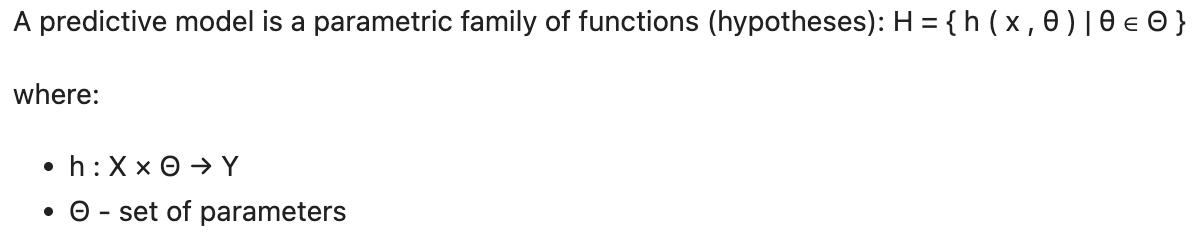

In [25]:
Image(filename="images/f10.png")

Empirical risk minimization is a principle in statistical learning theory for a wide range of problems, including supervised learning, in particular classification and regression problems.

We introduce a real-valued function (error function):

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mstyle mathsize="1.2em">
    <mi>L</mi>
    <mo>:</mo>
    <mi>Y</mi>
    <mo>&#xD7;</mo>
    <mi>Y</mi>
    <mo stretchy="false">&#x2192;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi mathvariant="double-struck">R</mi>
    </mrow>
  </mstyle>
</math>


with which we will measure how much the forecast differs <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="1.2em">
    <mrow data-mjx-texclass="ORD">
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
  </mstyle>
</math>
  from the true value of the target variable <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="1.2em">
    <mi>y</mi>
  </mstyle>
</math>.


The risk of the hypothesis h is the expected value of the error function according to the distribution of examples:



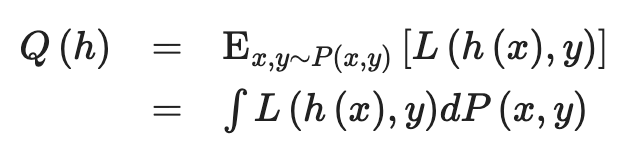

In [16]:
Image(filename="images/f1.png")

Unfortunately, the joint density **P(x,y)** is unknown (otherwise there would be no problem). But we can compute an approximation of the expression above as the mean of the sample cost function (empirical risk):

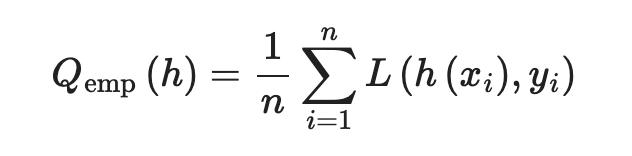

In [17]:
Image(filename="images/f2.png")

So, we must choose the hypothesis that minimizes the empirical risk:

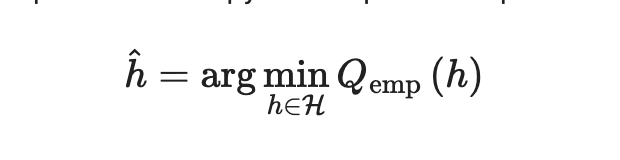

In [18]:
Image(filename="images/f3.png")

Examples of error functions:

- classification  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="1.2em">
    <mi>L</mi>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">(</mo>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>y</mi>
          <mo stretchy="false">^</mo>
        </mover>
      </mrow>
      <mo>,</mo>
      <mi>y</mi>
      <mo data-mjx-texclass="CLOSE">)</mo>
    </mrow>
    <mo>=</mo>
    <mtext>I</mtext>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">[</mo>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>y</mi>
          <mo stretchy="false">^</mo>
        </mover>
      </mrow>
      <mo>=</mo>
      <mi>y</mi>
      <mo data-mjx-texclass="CLOSE">]</mo>
    </mrow>
  </mstyle>
</math>
- regression <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="1.2em">
    <mi>L</mi>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">(</mo>
      <mrow data-mjx-texclass="ORD">
        <mover>
          <mi>y</mi>
          <mo stretchy="false">^</mo>
        </mover>
      </mrow>
      <mo>,</mo>
      <mi>y</mi>
      <mo data-mjx-texclass="CLOSE">)</mo>
    </mrow>
    <mo>=</mo>
    <msup>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">(</mo>
        <mrow data-mjx-texclass="ORD">
          <mover>
            <mi>y</mi>
            <mo stretchy="false">^</mo>
          </mover>
        </mrow>
        <mo>&#x2212;</mo>
        <mi>y</mi>
        <mo data-mjx-texclass="CLOSE">)</mo>
      </mrow>
      <mn>2</mn>
    </msup>
  </mstyle>
</math>

The main disadvantage of the empirical risk minimization principle is overfitting:
- the model has a generalizing ability if the probability of an error on the test data set (such a set of examples that did not participate in training in any form) is small or predictable
- overfitting is the fact that the model shows very good results on the training set and bad on the test set. Such models do not have a generalizing ability

## Example



In [36]:
# plot graphics in the notebook 
%matplotlib inline
# support operations for large, multi-dimensional arrays and matrices
import numpy as np
# make experiments reproducible
np.random.seed(12345)
# extension of main plotting library matplotlib
import seaborn as sns
# main library for plotting
import matplotlib.pyplot as plt
# set style
plt.style.use("fivethirtyeight")
# set default size of plots
plt.rcParams['figure.figsize'] = 16, 10

In [37]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data


In [38]:
# sample 25 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, 25)
print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

Shape of X is (25,)
Head of X is [0.48428956 0.57234221 0.66039485 0.74215802 0.81134225 1.30821075
 1.67928977 1.79250031 1.98118456 2.2453425 ]


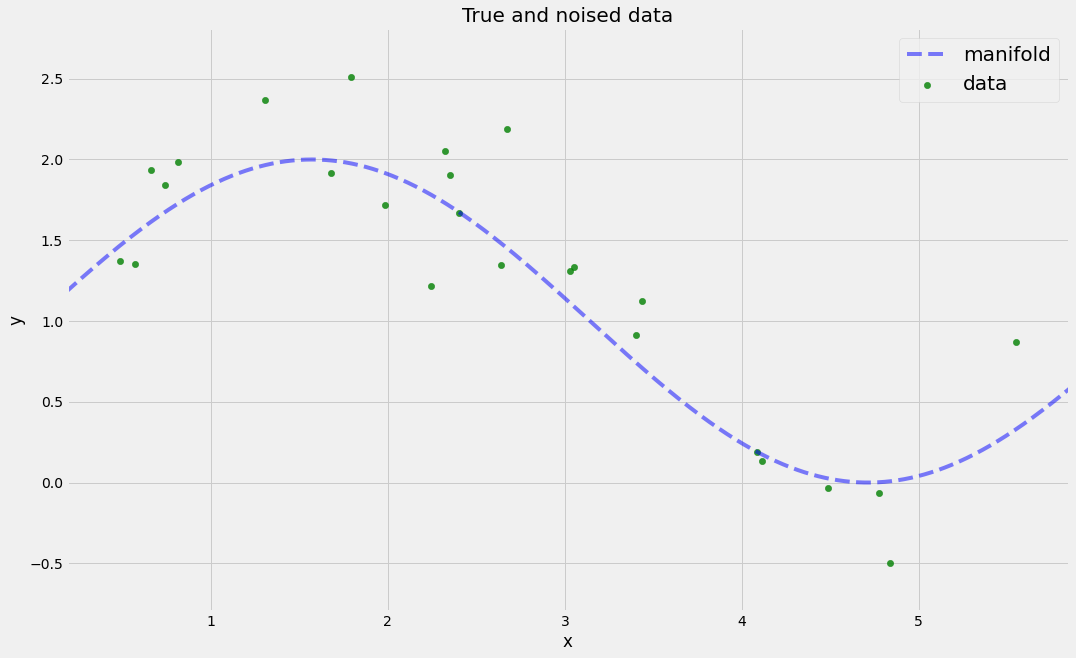

In [39]:
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True and noised data', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Linear regression is a way to model the relationship between two variables. You might also recognize the equation as the slope formula. The equation has the form **Y= a + bX**, where **Y** is the dependent variable (that’s the variable that goes on the Y axis), **X** is the independent variable

It can also be noted as a polynome:

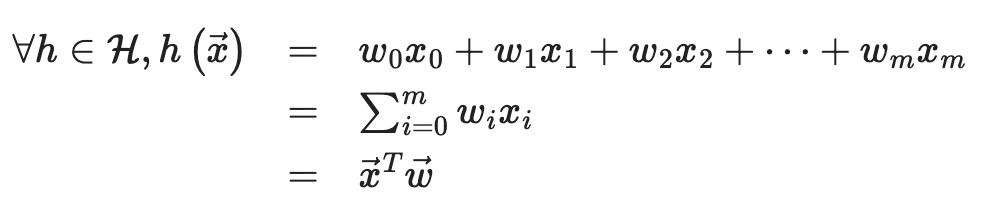

In [19]:
Image(filename="images/f4.png")

Then the empirical risk takes the form of the root mean square error (RMSE):

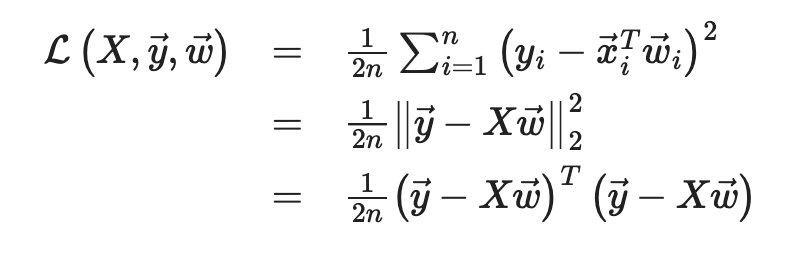

In [20]:
Image(filename="images/f5.png")

We can define the learning algorithm. Let's use the fact that the cost function in this case is convex, this will allow us to find the global optimum:

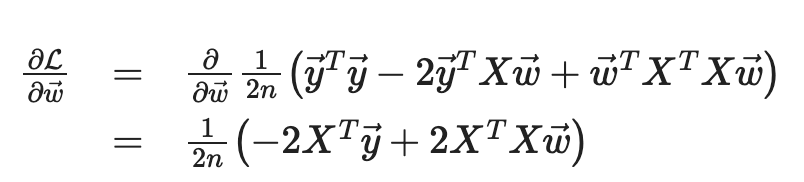

In [21]:
Image(filename="images/f6.png")

This solution is called the method of least squares (LSM):

(The least square method is the process of finding the best-fitting curve or line of best fit for a set of data points by reducing the sum of the squares of the offsets (residual part) of the points from the curve)

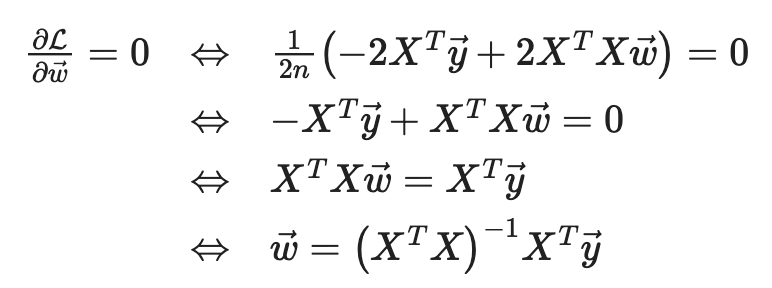

In [22]:
Image(filename="images/f7.png")

In [40]:
# add column of ones to the first position
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Top rows of X')
print(X[:5, :])

Top rows of X
[[1.         0.48428956]
 [1.         0.57234221]
 [1.         0.66039485]
 [1.         0.74215802]
 [1.         0.81134225]]


In [41]:
# linear algebra magic of numpy
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])

In [42]:
y_hat = np.dot(w, X.T)

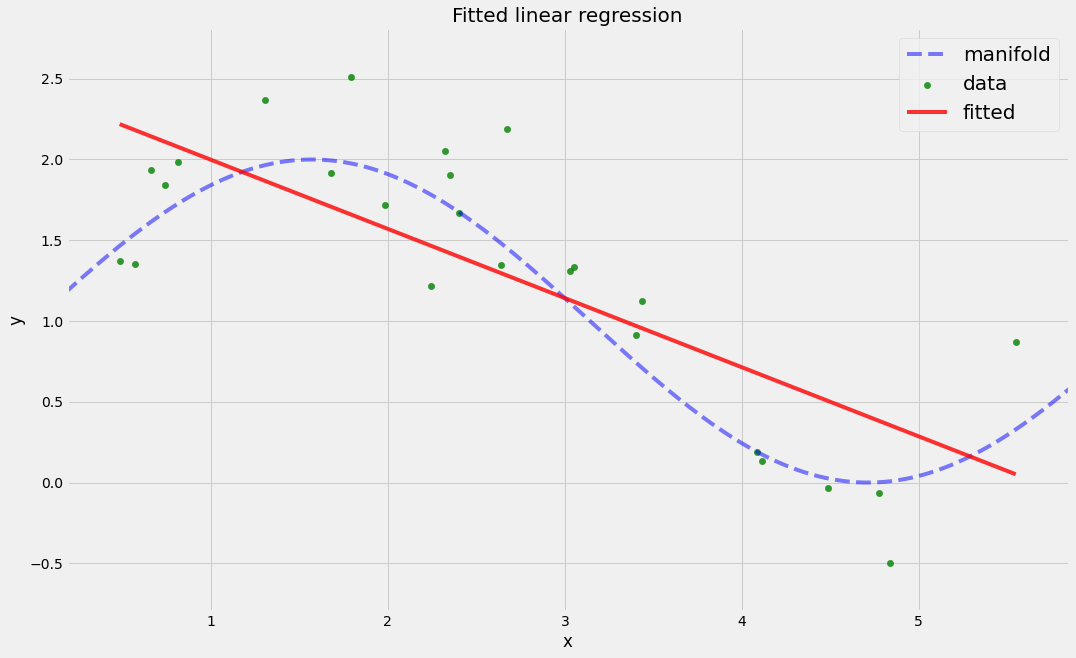

In [43]:
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Polynomial regression

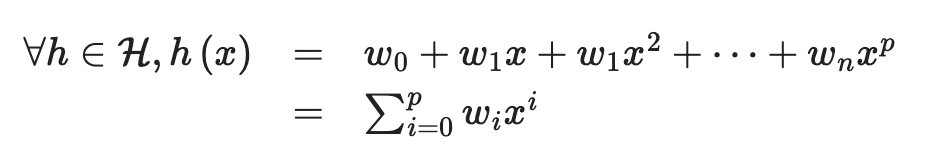

In [23]:
Image(filename="images/f8.png")

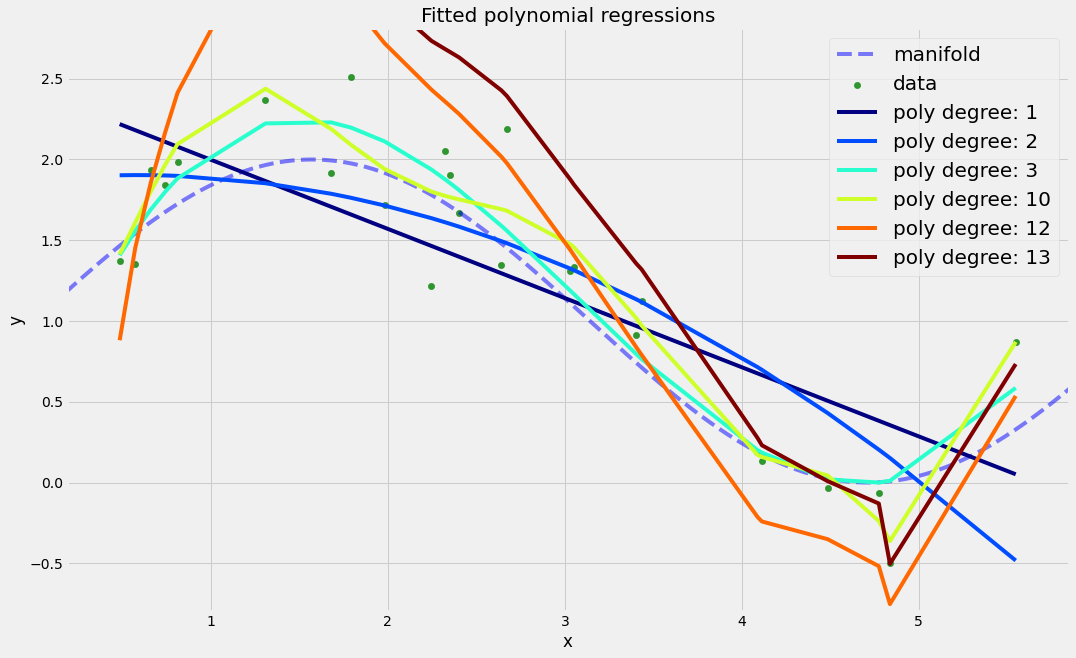

In [44]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

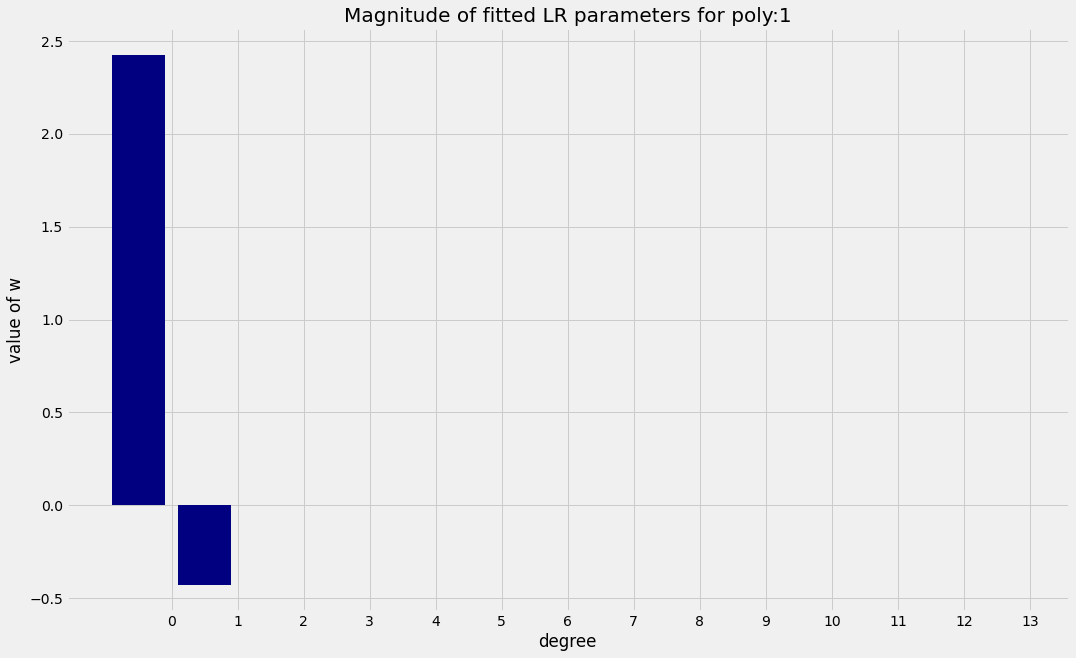

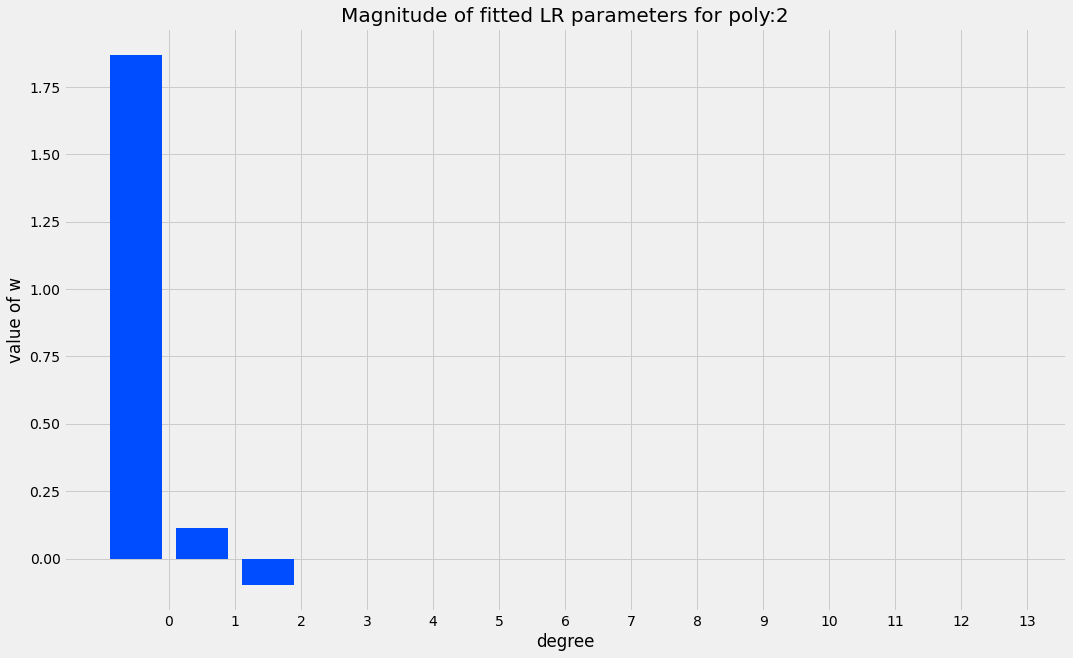

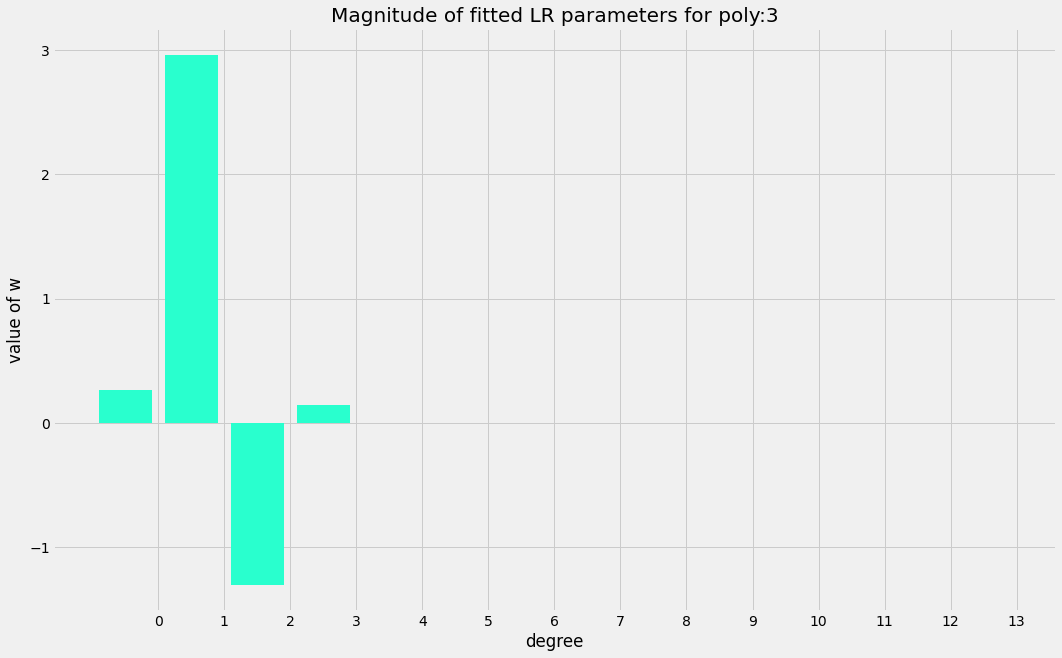

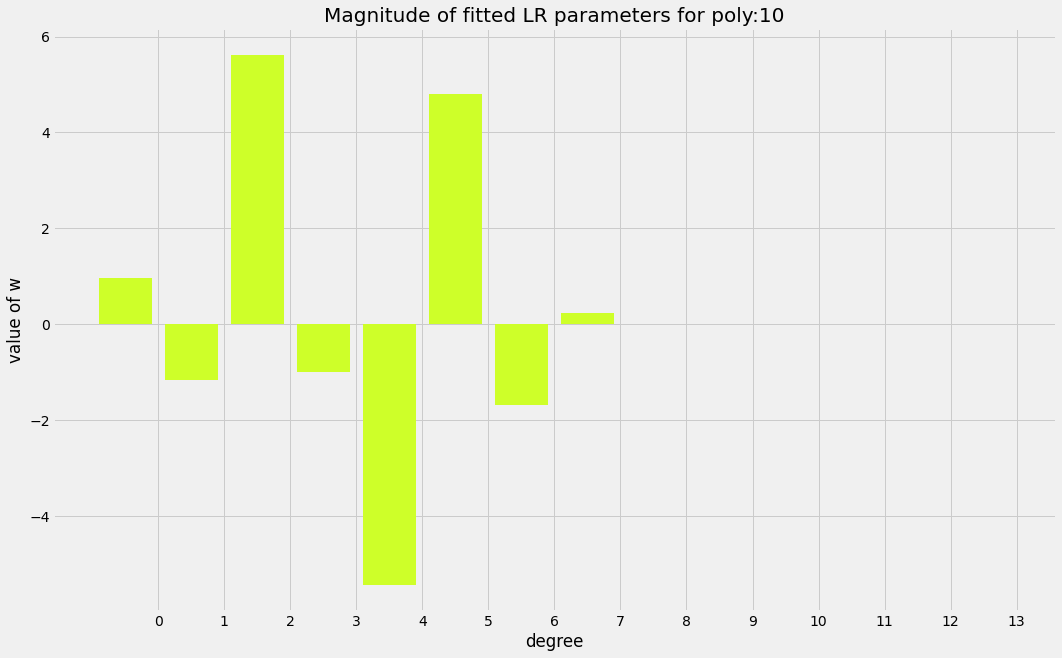

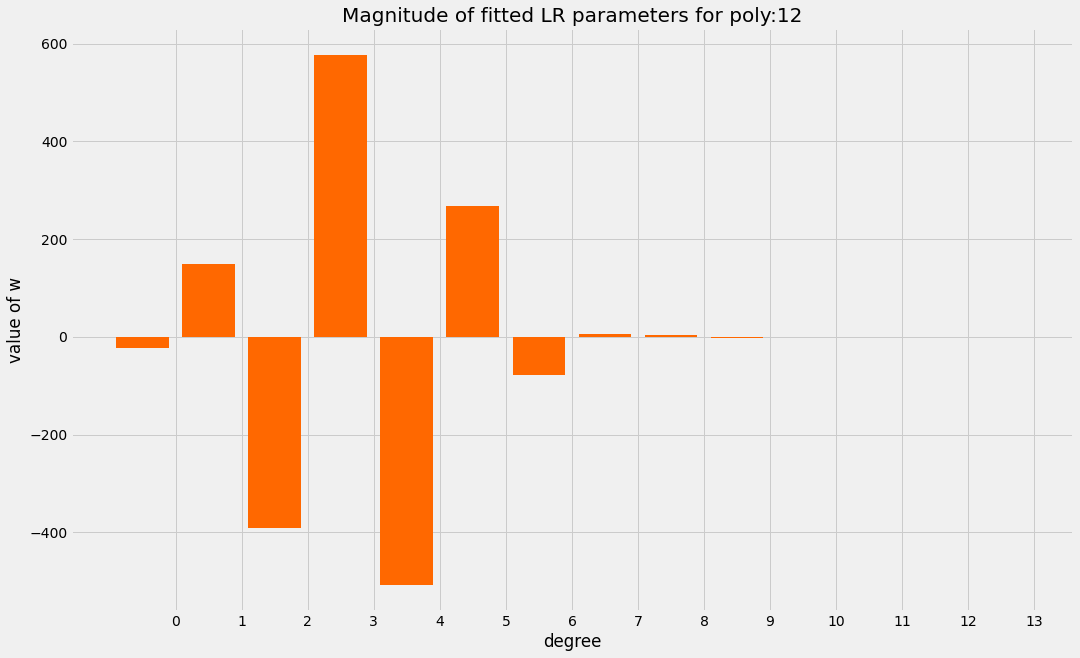

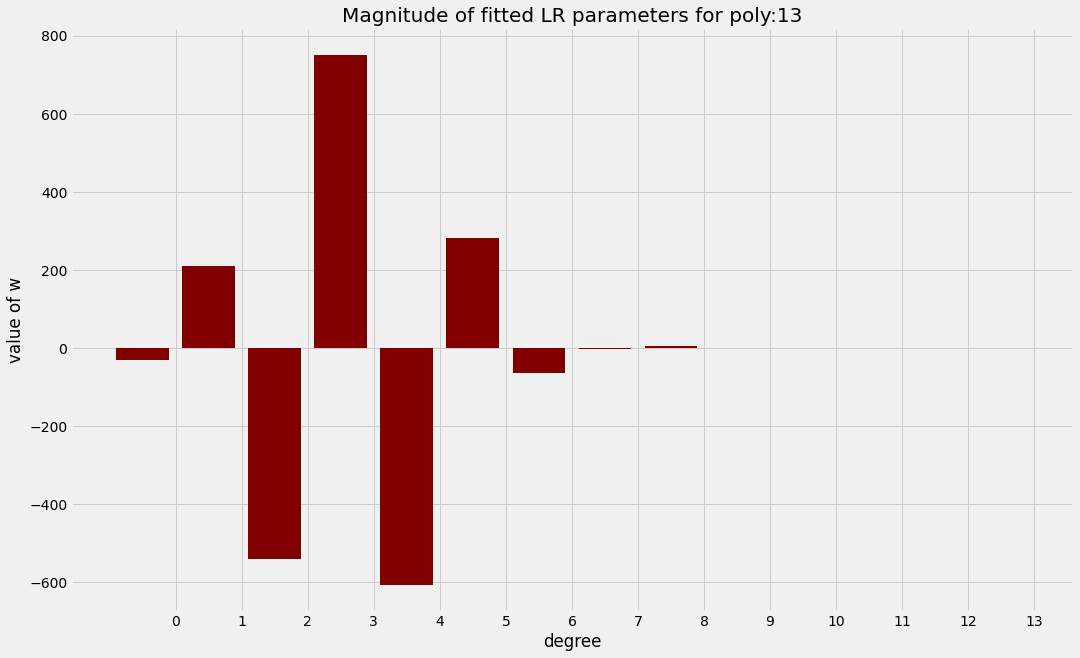

In [45]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree, fontsize=20)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

We can see the overfitting: the learned function interpolates the data (it tries to go through almost every data point). We also see that the absolute values of the weights grow along with the increase in the degree of the polynomial. We can add some kind of penalty on the amplitude of the weights? In general, the penalty looks like this:

(where lambda is a regularization parameter)

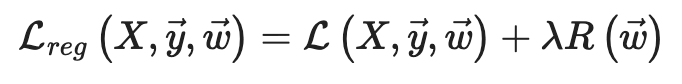

In [24]:
Image(filename="images/f9.png")

Such approach is called regularization.

A regression model that uses L2 regularization is also called Ridge Regression.

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. 

Here, if lambda is zero then we get back OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen. This technique works very well to avoid over-fitting issue.

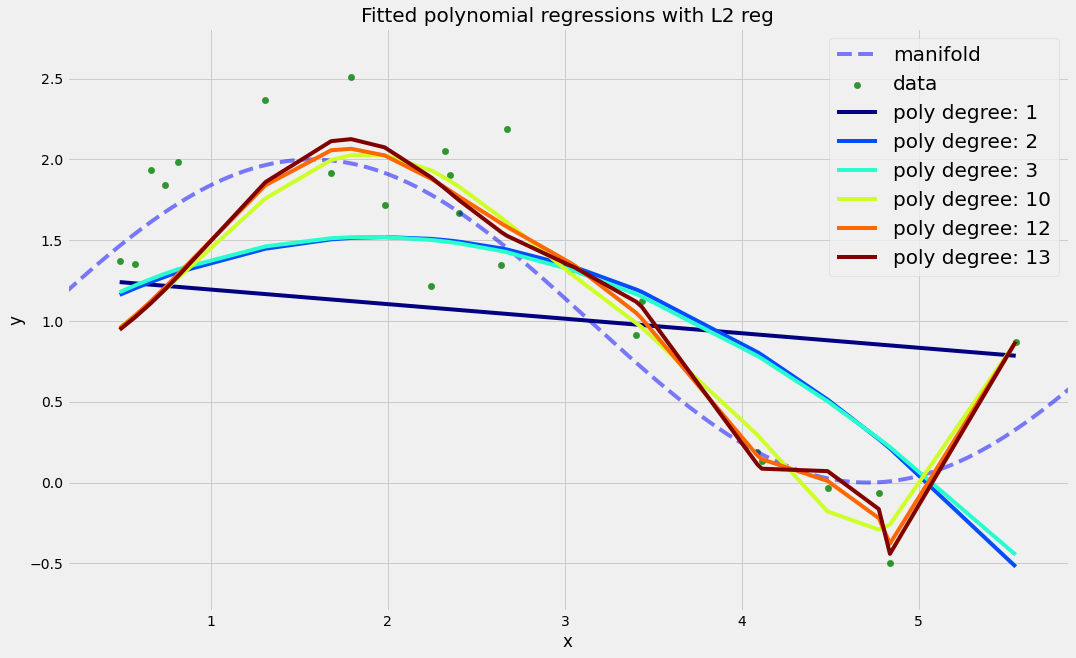

In [46]:
# define regularization parameter
lmbd = 5

degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list_l2 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    w_list_l2.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L2 reg', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [47]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.5665047634822159
2 0.33143638207057874
3 0.31719073128325515
10 0.15052664525110593
12 0.1369069968004969
13 0.1414699205628733


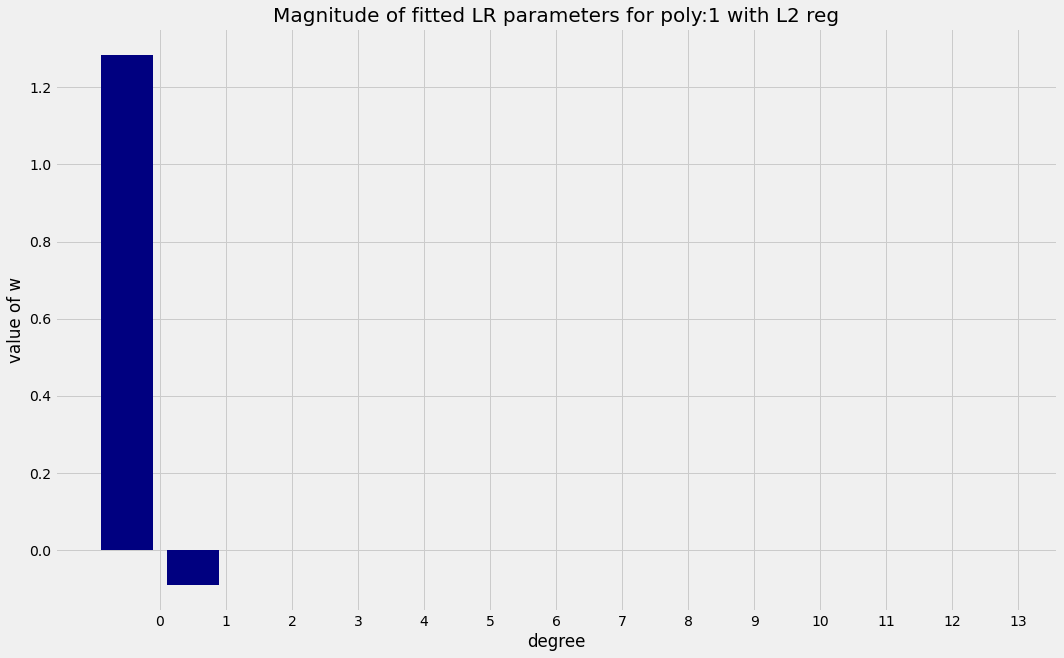

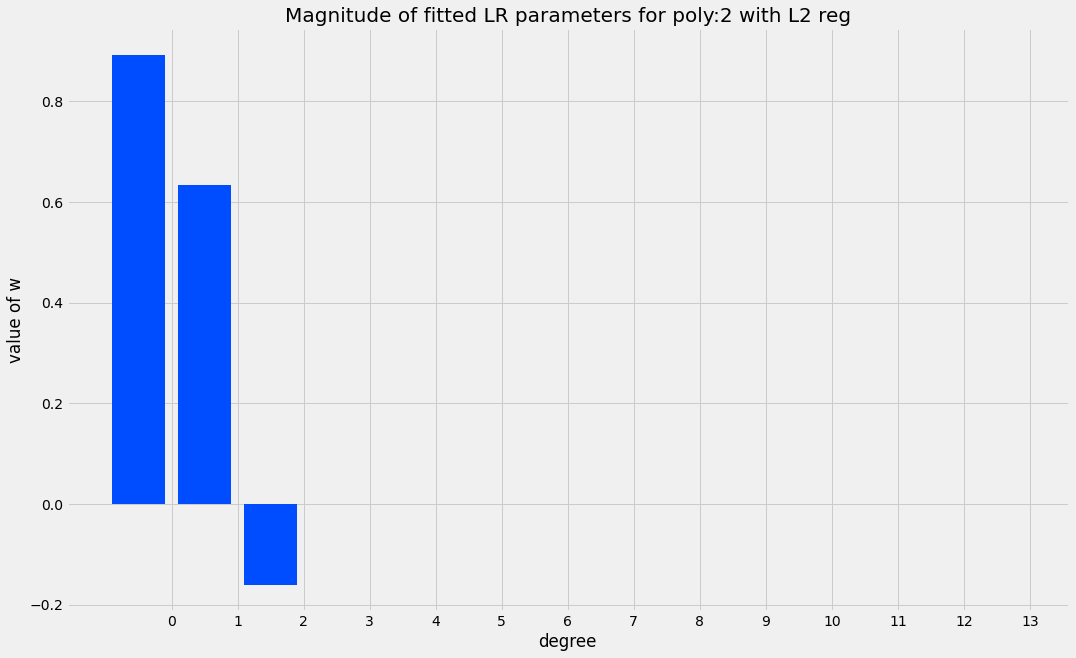

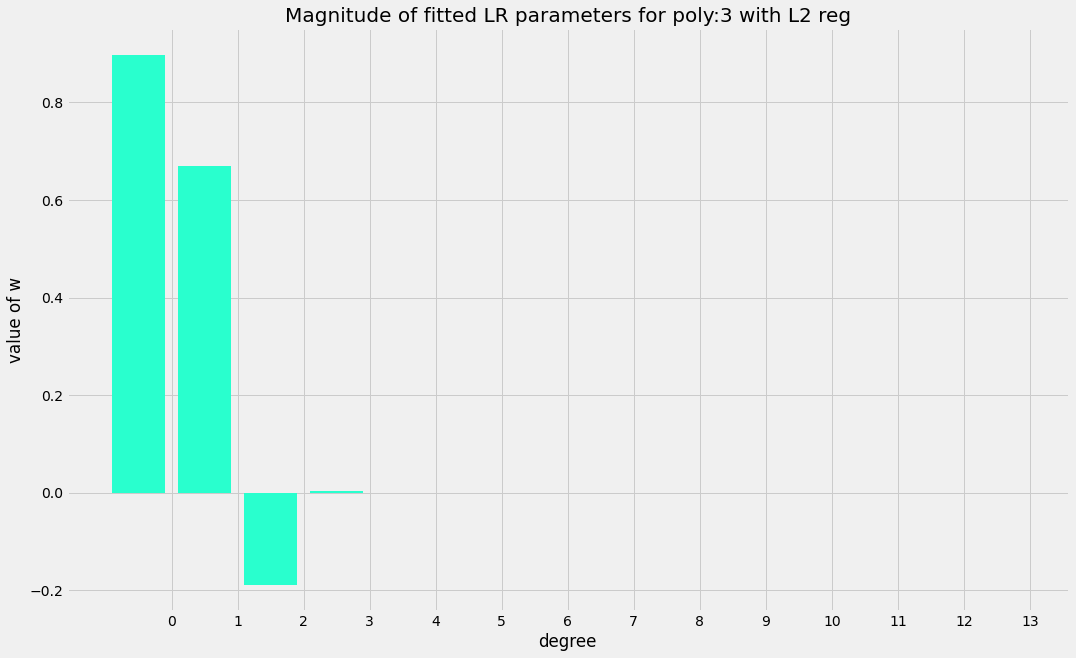

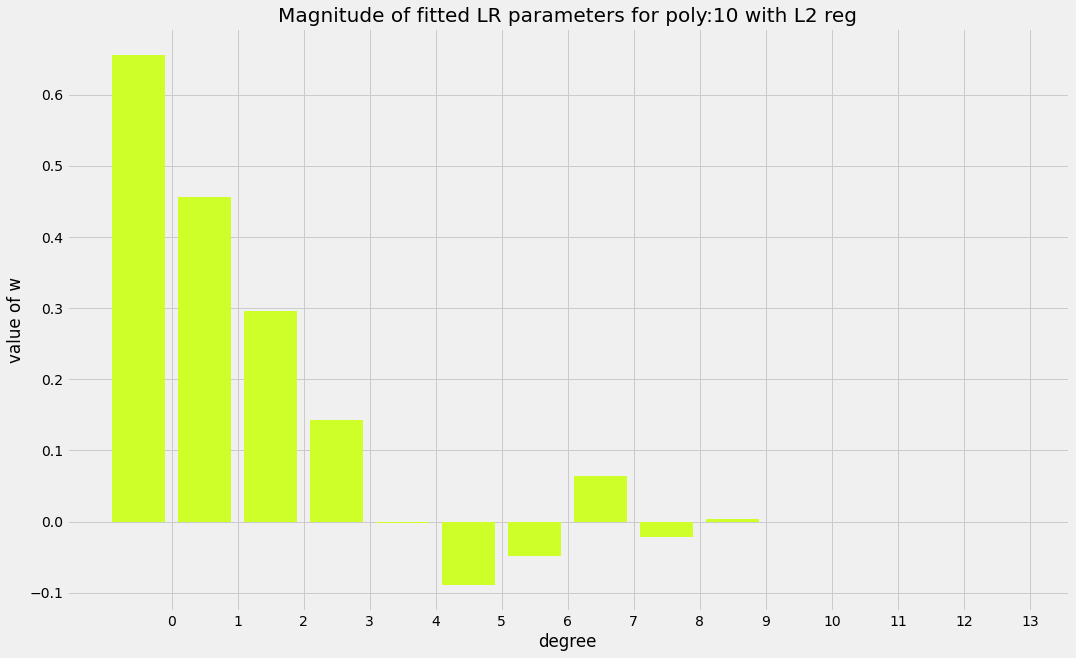

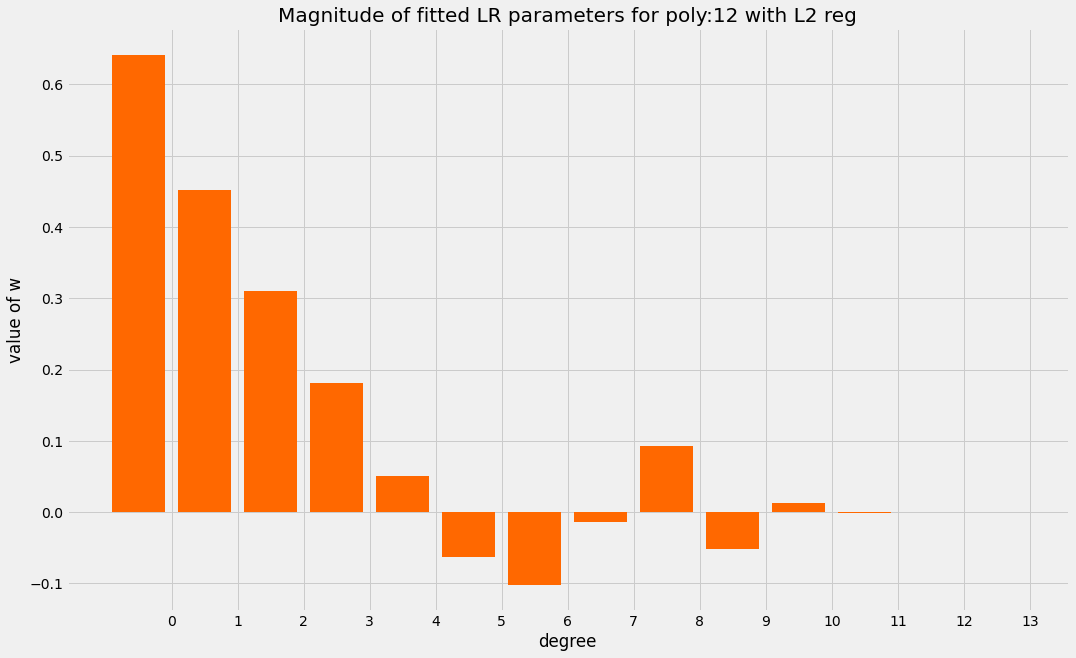

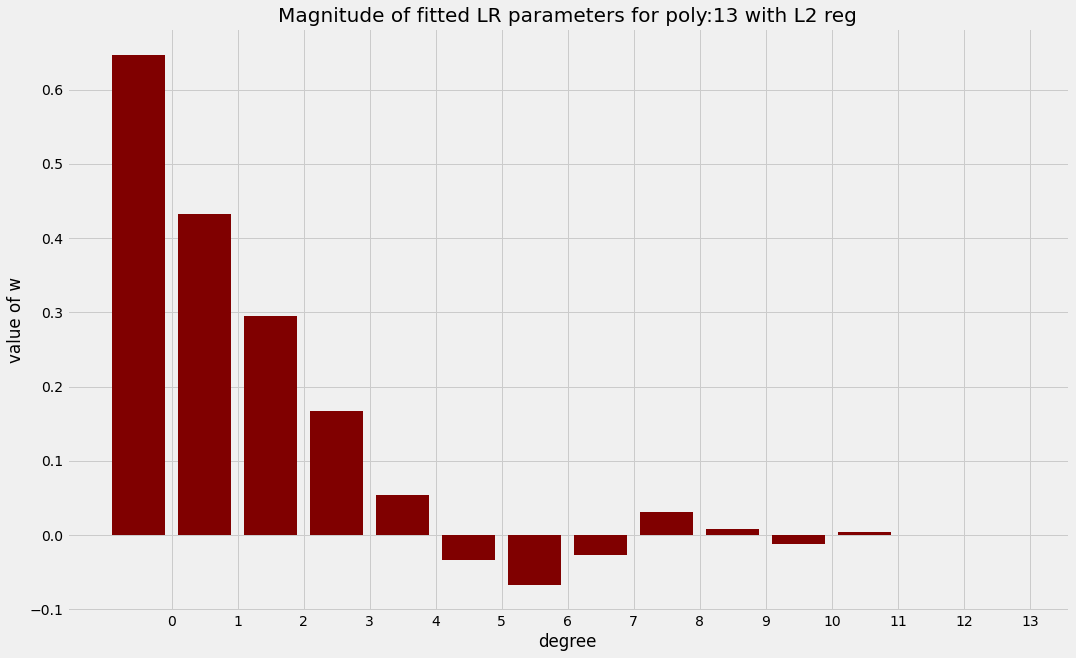

In [48]:
for ix, t in enumerate(w_list_l2):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L2 reg' % degree, fontsize=20)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# Homework

- describe business problem that should be solved with NLP (example: detect hate speech)
- describe data that should be gathered
- describe NLP tasks that should be used
- chose metric for evaluation

# Sources:

- https://www.statlearning.com/
- https://www.ibm.com/docs/it/spss-modeler/saas?topic=dm-crisp-help-overview
- https://www.datascience-pm.com/crisp-dm-2/
- https://en.wikipedia.org/wiki/Precision_and_recall
- https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce
- https://medium.com/analytics-vidhya/complete-guide-to-machine-learning-evaluation-metrics-615c2864d916
- https://towardsdatascience.com/data-science-crash-course-in-depth-linear-regression-fd06511f586c